<a href="https://colab.research.google.com/github/Luganda1/Google-colab-/blob/main/Nobel_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install  --upgrade plotly

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc # contains imgs
from PIL import Image # for reading img files
from numpy.random import default_rng
import datetime as dt
import pandas as pd
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import matplotlib.dates as mdates

df_data = pd.read_csv('nobel_prize_data.csv')

#Challenge 1

Preliminary data exploration.

    What is the shape of df_data? How many rows and columns?

    What are the column names and what kind of data is inside of them?

    In which year was the Nobel prize first awarded?

    Which year is the latest year included in the dataset?

Challenge 2

    Are there any duplicate values in the dataset?

    Are there NaN values in the dataset?

    Which columns tend to have NaN values?

    How many NaN values are there per column?

    Why do these columns have NaN values?

Challenge 3

    Convert the birth_date column to Pandas Datetime objects

    Add a Column called share_pct which has the laureates' share as a percentage in the form of a floating-point number.

In [ ]:
df_data.shape

(962, 16)

In [ ]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [ ]:
print(f'Data type year {type(df_data.year[1])}')
print(f'Data type category {type(df_data.category[1])}')
print(f'Data type prize: {type(df_data.prize[1])}')
print(f'Data type motivation {type(df_data.motivation[1])}')
print(f'Data type Prize Share {type(df_data.prize_share[1])}')

Data type year <class 'numpy.int64'>
Data type category <class 'str'>
Data type prize: <class 'str'>
Data type motivation <class 'str'>
Data type Prize Share <class 'str'>


In [ ]:
type(df_data.year[1])

numpy.int64

In [ ]:
print(df_data.sort_values('year', ascending=True))

     year    category  ...      organization_country  ISO
0    1901   Chemistry  ...                   Germany  NLD
1    1901  Literature  ...                       NaN  FRA
2    1901    Medicine  ...                   Germany  POL
3    1901       Peace  ...                       NaN  FRA
4    1901       Peace  ...                       NaN  CHE
..    ...         ...  ...                       ...  ...
951  2020   Chemistry  ...  United States of America  USA
950  2020   Chemistry  ...                   Germany  FRA
960  2020     Physics  ...  United States of America  DEU
954  2020  Literature  ...                       NaN  USA
961  2020     Physics  ...            United Kingdom  GBR

[962 rows x 16 columns]


In [ ]:
print(f'Duplicate values for dataset?: {df_data.duplicated().values.any()}')

Duplicate values for dataset?: False


We notice that the columns contain the following information:

birth_date: date in string format

motivation: description of what the prize is for

prize_share: given as a fraction

laureate_type: individual or organisation

birth_country: has countries that no longer exist

birth_country_current: current name of the country where the birth city is located

ISO: three-letter international country code

organization_name: research institution where the discovery was made

organization_city: location of the institution


Solution 2: NaN values

There are no duplicates in the dataset:

    print(f'Any duplicates? {df_data.duplicated().values.any()}')

However, there are a number of NaN values

    print(f'Any NaN values among the data? {df_data.isna().values.any()}')

We can get a count of the NaN values per column using

    df_data.isna().sum()

In [ ]:
print(f'Missing values for Dataset?: {df_data.isna().values.any()}')

Missing values for Dataset?: True


In [ ]:
#How many NaN values are there per column?
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

Why are there so many NaN values for the birth date? And why are there so many missing values among the organisation columns?

Filtering on the NaN values in the birth date column we see that we get back a bunch of organisations, like the UN or the Red Cross. 

In [ ]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


That makes sense. We also see that since the organisation's name is in the full_name column, the organisation_name column contains NaN.

In addition, when we look at for rows where the organization_name column has no value, we also see that many prizes went to people who were not affiliated with a university or research institute. This includes many of the Literature and Peace prize winners.

In [ ]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


**Converting to timeSeries (datetime)**

In [ ]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
type(df_data.birth_date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_data.laureate_type

0        Individual
1        Individual
2        Individual
3        Individual
4        Individual
           ...     
957      Individual
958    Organization
959      Individual
960      Individual
961      Individual
Name: laureate_type, Length: 962, dtype: object

In [ ]:
df_data.prize_share

0      1/1
1      1/1
2      1/1
3      1/2
4      1/2
      ... 
957    1/3
958    1/1
959    1/4
960    1/4
961    1/2
Name: prize_share, Length: 962, dtype: object

In [ ]:
shared_value = df_data.prize_share.str.split('/', expand=True)
enumerator = pd.to_numeric(shared_value[0])
denominator = pd.to_numeric(shared_value[1])
df_data['share_pct'] = round(enumerator / denominator, 2)
df_data.share_pct

0      1.00
1      1.00
2      1.00
3      0.50
4      0.50
       ... 
957    0.33
958    1.00
959    0.25
960    0.25
961    0.50
Name: share_pct, Length: 962, dtype: float64

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

Challenge 2

Create a donut [chart (link) ](https://plotly.com/python/pie-charts/) using plotly which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [ ]:
df_data.sex

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
957      Male
958       NaN
959    Female
960      Male
961      Male
Name: sex, Length: 962, dtype: object

In [ ]:
# female = df_data[df_data.sex == 'Female']
# male = df_data[df_data.sex == 'Male']
# values= [len(male), len(female)]
# labels = ['Male', 'Female']

In [ ]:
gender = df_data[['full_name', 'sex']].groupby('sex').count()
gender

,full_name
sex,
Female,58
Male,876


In [ ]:
gender.values

array([[ 58],
       [876]])

In [ ]:
fig = px.pie(
    labels=gender.index, 
    values=gender.values,
    title="What percentage of all the prizes went to women?",
    names=gender.index,
    hole=0.3)
fig.update_traces(textposition='inside', textfont_size=13, textinfo='percent')

fig.show()

Solution 2: Creating a Donut Chart with Plotly

To create the chart we use the our .value_counts() method together with plotly's .pie() function. We see that out of all the Nobel laureates since 1901, only about 6.2% were women.

    biology = df_data.sex.value_counts()
    fig = px.pie(labels=biology.index, 
                 values=biology.values,
                 title="Percentage of Male vs. Female Winners",
                 names=biology.index,
                 hole=0.4,)
     
    fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
     
    fig.show()

```
# This is formatted as code
```



Challenge 3

    What are the names of the first 3 female Nobel laureates?

    What did the win the prize for?

    What do you see in their birth_country? Were they part of an organisation?

In [ ]:
df_data[df_data.sex == 'Female'].sort_values('year', ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


Marie, Baroness, Selam
Physics, Peace, Literature
they were individuals and not atttatched to any organisation

Challenge 4

Did some people get a Nobel Prize more than once? If so, who were they?

In [ ]:
print(f'Duplicate values for dataset?: {df_data.full_name.duplicated().values.any()}')

Duplicate values for dataset?: True


In [ ]:
df_data[df_data.full_name.duplicated()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR,0.25
523,1981,Peace,The Nobel Peace Prize 1981,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [ ]:
    is_winner = df_data.duplicated(subset=['full_name'], keep=False)
    multiple_winners = df_data[is_winner]
    print(f'There are {multiple_winners.full_name.nunique()}' \
          ' winners who were awarded the prize more than once.')

There are 6 winners who were awarded the prize more than once.


In [ ]:
    col_subset = ['year', 'category', 'laureate_type', 'full_name']
    multiple_winners[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


Only 4 of the repeat laureates were individuals.


We see that Marie Curie actually got the Nobel prize twice - once in physics and once in chemistry. Linus Carl Pauling got it first in chemistry and later for peace given his work in promoting nuclear disarmament. Also, the International Red Cross was awarded the Peace prize a total of 3 times. The first two times were both during the devastating World Wars. 

Challenge 5

    In how many categories are prizes awarded?

    Create a plotly bar chart with the number of prizes awarded by category.

    Use the color scale called Aggrnyl to colour the chart, but don't show a color axis.

    Which category has the most number of prizes awarded?

    Which category has the fewest number of prizes awarded?

In [ ]:
df_data.category.nunique()
prizes_per_category = df_data.category.value_counts()
#we can instead use value_counts()
categories = df_data[['full_name', 'category']].groupby('category').count()
categories

,full_name
category,
Chemistry,186
Economics,86
Literature,117
Medicine,222
Peace,135
Physics,216


In [ ]:
# ***
# bar = px.bar(
#     x = num_genres.index[:15],
#     y = num_genres.values[:15],
#     title='Top Genre',
#     hover_name=num_genres.index[:15],
#     color=num_genres.values[:15],
#     color_continuous_scale='Agsunset'
# )
# bar.update_layout(xaxis_title='Genre', yaxis_title='Number of Apps', coloraxis_showscale=False)
# bar.show()
# ***

In [ ]:

bar = px.bar(
    x = categories.index,
    y = categories.values,
    title='Categories awarded i.e. considered',
    hover_name=categories.index,
    color=categories.values,
    color_continuous_scale='Aggrnyl'
)
bar.update_layout(xaxis_title='Nobel Prize Categories', yaxis_title='Number of Awards', coloraxis_showscale=False)
bar.show()

**Review**
Per the bar chart Medice has the most number of awards  followed by Physics and economics is the least awarded.

Challenge 6

    When was the first prize in the field of Economics awarded?

    Who did the prize go to?

In [ ]:
df_data.loc[df_data.category == 'Economics'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.5
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.5
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.0


According to the data the first prize in the field of economics went  Jen tinmbergen back in the 1969 at he age of 66yrs

Challenge 7

Create a plotly bar chart that shows the split between men and women by category.

    Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

In [ ]:
category_gender = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
category_gender.sort_values('prize', ascending=False, inplace=True)
category_gender

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [ ]:

bar = px.bar(
            x=category_gender.category,
            y=category_gender.prize,
            color=category_gender.sex
)
bar.update_layout(
    xaxis_title='Nobel Prize Category', 
    yaxis_title='Number of Awards',                    
    
    )
bar.show()

We see that overall the imbalance is pretty large with physics, economics, and chemistry. Women are somewhat more represented in categories of Medicine, Literature and Peace. Splitting bar charts like this is an incredibly powerful way to show a more granular picture.

#Using Matplotlib to Visualise Trends over Time

Challenge 1

Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.

    Count the number of prizes awarded every year.

    Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).

    Using Matplotlib superimpose the rolling average on a scatter plot.

    Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

    Use the named colours to draw the data points in dogerblue while the rolling average is coloured in crimson.

    Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?

    What could be the reason for the trend in the chart?

In [ ]:
prizes_year = df_data.groupby('year').agg({'prize': pd.Series.count})
prizes_year

,prize
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


In [ ]:
rolling_average = prizes_year.rolling(window=5).mean()

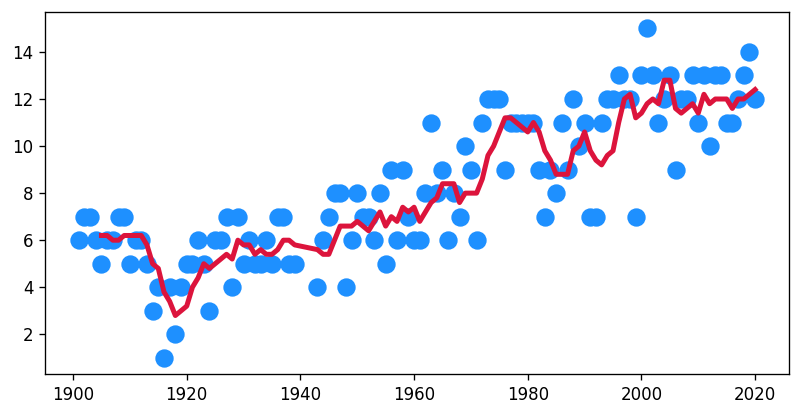

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
plt.scatter(
    x=prizes_year.index,
    y=prizes_year.values,
    s=100,
    color='dodgerblue',
    )
plt.plot(
    prizes_year.index,
    rolling_average.values,
    c="crimson",
    linewidth=3,
     )
plt.show()

With the help of a little styling, this chart could look better. To create 5-year tick marks on the x-axis, we generate an array using NumPy:

    np.arange(1900, 2021, step=5)

Then we tap into functions like the .figure(), the .title(), the .xticks(), and .yticks() to fine-tune the chart.

In addition, we will shortly be adding a second y-axis, so we can use an Axes object to draw our scatter and line plots. 

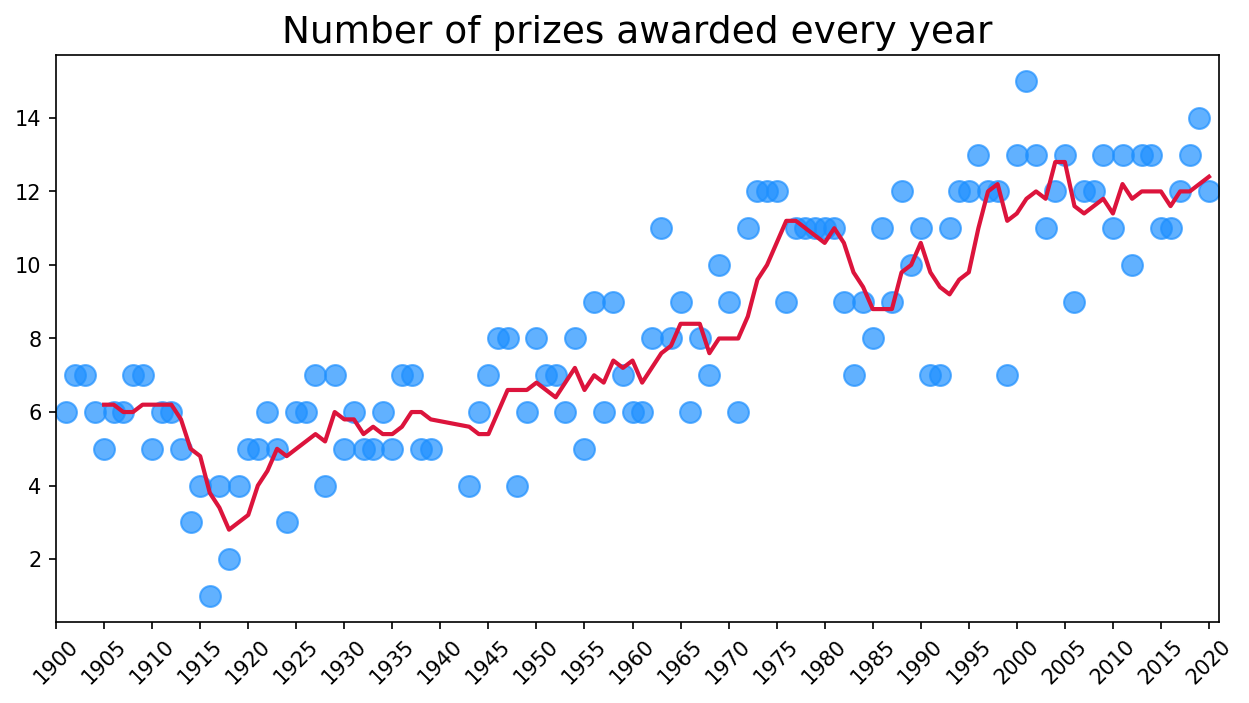

In [ ]:
plt.figure(figsize=(10,5), dpi=150)
plt.title('Number of prizes awarded every year', fontsize=18)
plt.yticks(fontsize=10)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=10, rotation=45)

ax = plt.gca()
ax.set_xlim(1900, 2021)


ax.scatter(
    x=prizes_year.index,
    y=prizes_year.values,
    s=100,
    color='dodgerblue',
    alpha=0.7,
    )
ax.plot(
    prizes_year.index,
    rolling_average.values,
    c="crimson",
    linewidth=2,
     )
plt.show()

#Challenge 2

Investigate if more prizes are shared than before.

    Calculate the average prize share of the winners on a year by year basis.

    Calculate the 5 year rolling average of the percentage share.

    Copy-paste the cell from the chart you created above.

    Modify the code to add a secondary axis to your Matplotlib chart.

    Plot the rolling average of the prize share on this chart.

    See if you can invert the secondary y-axis to make the relationship even more clear.




Check this on [Data Grouping in Python](https://towardsdatascience.com/data-grouping-in-python-d64f1203f8d3)

In [ ]:
average_prize_share = df_data.groupby('year').agg({'share_pct': pd.Series.mean})
average_prize_share

,share_pct
year,
1901,0.833333
1902,0.714286
1903,0.714286
1904,0.833333
1905,1.000000
...,...
2016,0.544545
2017,0.498333
2018,0.461538


In [ ]:
share_rolling_average = average_prize_share.rolling(window=5).mean()

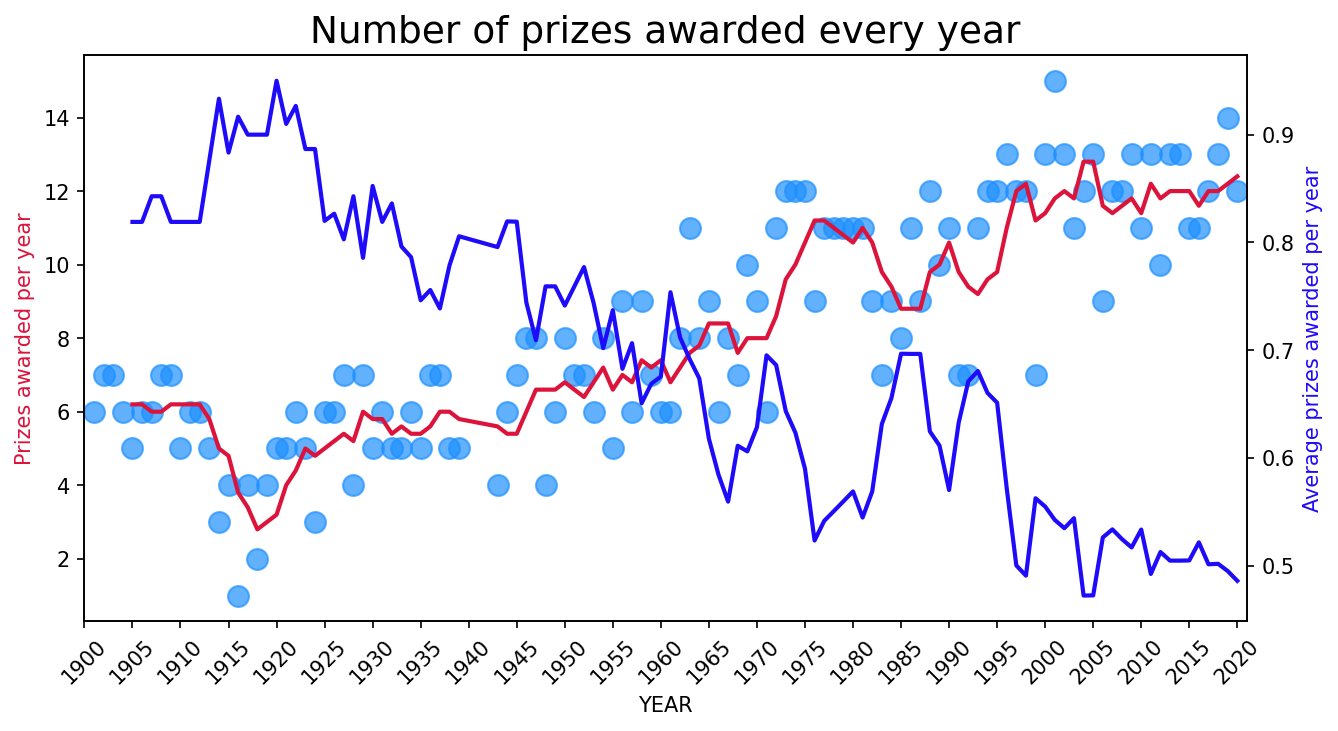

In [ ]:
plt.figure(figsize=(10,5), dpi=150)
plt.title('Number of prizes awarded every year', fontsize=18)
plt.yticks(fontsize=10)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=10, rotation=45)

ax = plt.gca()
ax2 = ax.twinx()
ax.set_xlim(1900, 2021)



ax.scatter(
    x=prizes_year.index,
    y=prizes_year.values,
    s=100,
    color='dodgerblue',
    alpha=0.7,
    )
#
ax.plot(
    prizes_year.index,
    rolling_average.values,
    c="crimson",
    linewidth=2,
     )
## Adding prize share plot on second axis
ax2.plot(
    average_prize_share.index,
    share_rolling_average.values,
    c="#1e0bf9",
    linewidth=2,
     )

ax.set_xlabel('YEAR', fontsize=10,)
ax.set_ylabel('Prizes awarded per year', fontsize=10, color='crimson')
ax2.set_ylabel('Average prizes awarded per year', fontsize=10, color='#1e0bf9')
plt.show()

#Invert the second chart to better understand it

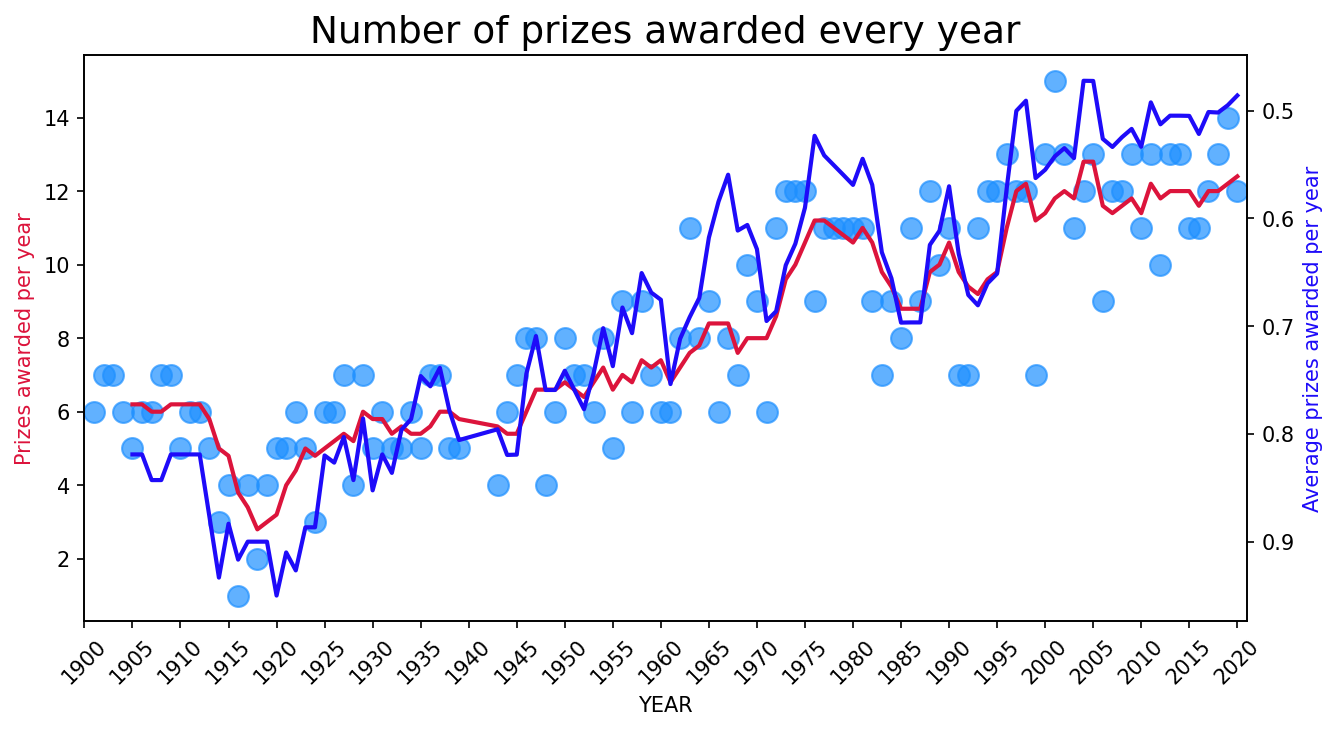

In [ ]:
plt.figure(figsize=(10,5), dpi=150)
plt.title('Number of prizes awarded every year', fontsize=18)
plt.yticks(fontsize=10)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=10, rotation=45)

ax = plt.gca()
ax2 = ax.twinx()
ax.set_xlim(1900, 2021)

# Can invert axis
ax2.invert_yaxis()

ax.scatter(
    x=prizes_year.index,
    y=prizes_year.values,
    s=100,
    color='dodgerblue',
    alpha=0.7,
    )
#
ax.plot(
    prizes_year.index,
    rolling_average.values,
    c="crimson",
    linewidth=2,
     )
## Adding prize share plot on second axis
ax2.plot(
    average_prize_share.index,
    share_rolling_average.values,
    c="#1e0bf9",
    linewidth=2,
     )

ax.set_xlabel('YEAR', fontsize=10,)
ax.set_ylabel('Prizes awarded per year', fontsize=10, color='crimson')
ax2.set_ylabel('Average prizes awarded per year', fontsize=10, color='#1e0bf9')
plt.show()

What do we see on the chart? Well, there is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars. Note that instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.

#**A Choropleth Map and the Countries with the Most Prizes**

In [ ]:
top20_countries = df_data.groupby(['birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
top20_countries.sort_values('prize', inplace=True)
top20_countries = top20_countries[-20:]
top20_countries.head()

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12


In [ ]:
hor_bar = px.bar(x=top20_countries.prize,
    y=top20_countries.birth_country_current,
    orientation='h',
    color=top20_countries.prize,
    color_continuous_scale='Viridis',
    title='Number of prizes won by each country'
)
hor_bar.update_layout(xaxis_title='Number of prizes', yaxis_title='Country', coloraxis_showscale=False)
hor_bar.show()

The United States has a massive number of prizes by this measure. The UK and Germany are in second and third place respectively. 

Challenge 2: Choropleth Map

    Create this choropleth [map](https://plotly.com/python/choropleth-maps/) using the plotly documentation:



In [ ]:
df_country = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})
df_country.sort_values('prize', ascending=False)
df_country

,birth_country_current,ISO,prize
0,Algeria,DZA,2
1,Argentina,ARG,4
2,Australia,AUS,10
3,Austria,AUT,18
4,Azerbaijan,AZE,1
...,...,...,...
74,United States of America,USA,281
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [ ]:
    world_map = px.choropleth(df_country,
                              locations='ISO',
                              color='prize', 
                              hover_name='birth_country_current', 
                              color_continuous_scale=px.colors.sequential.matter)
     
    world_map.update_layout(coloraxis_showscale=True,)
     
    world_map.show()

Challenge 3: Country Bar Chart with Prize Category

See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

In [ ]:
category_bar = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
category_bar.sort_values('prize', ascending=False, inplace=True)
category_bar

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [ ]:
merged_data = pd.merge(category_bar, top20_countries, on='birth_country_current')
merged_data.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_data.sort_values('total_prize', inplace=True)
merged_data

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [ ]:
hor_bar = px.bar(x=merged_data.cat_prize,
    y=merged_data.birth_country_current,
    orientation='h',
    color=merged_data.category,
    color_continuous_scale='Inferno',
    title='Number of prizes won by each country'
)
hor_bar.update_layout(xaxis_title='Number of prizes', yaxis_title='Country', coloraxis_showscale=True)
hor_bar.show()

Germany and Japan are more weakest in in peace Nobel prizes compard to US


Germany has more Physics Nobel prizes comapred to UK

France has More Peace, Literature, and Ecomomics prizes compares to Germany

Australia has more Medicine prizes 

Which category makes up half of the prizes in the Netherlands? Physics

Splitting the country bar chart by category allows us to get a very granular look at the data and answer a whole bunch of questions. For example, we see is that the US has won an incredible proportion of the prizes in the field of Economics. In comparison, Japan and Germany have won very few or no economics prize at all. Also, the US has more prizes in physics or medicine alone than all of France's prizes combined. On the chart, we also see that Germany won more prizes in physics than the UK and that France has won more prizes in peace and literature than Germany, even though Germany has been awarded a higher total number of prizes than France.

When did the United States become so dominant? Was it always this way? Has the prize become more global in scope? 

Challenge 4: Prizes by Country over Time

Every country's fortunes wax and wane over time. Investigate how the total number of prizes awarded changed over the years.

    When did the United States eclipse every other country in terms of the number of prizes won?

    Which country or countries were leading previously?

    Calculate the cumulative number of prizes won by each country in every year. Again, use the birth_country_current of the winner to calculate this.

    Create a plotly line chart where each country is a coloured line.

In [ ]:
prize_vs_time = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_vs_time = prize_vs_time.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_vs_time

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [ ]:
cumulative_prize = prize_vs_time.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prize.reset_index(inplace=True) 
cumulative_prize

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
line_chart = px.line(
    cumulative_prize,
    x='year',
    y='prize',
    color='birth_country_current',
    hover_name='birth_country_current'
)
line_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
line_chart.show()

What we see is that the United States really started to take off after the Second World War which decimated Europe. Prior to that, the Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too. Perhaps this reflects a little bit of home bias? 😊 

#Create Sunburst Charts for a Detailed Regional Breakdown of Research Locations

In [ ]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)
top20_orgs

Sorbonne University                              7
University College London                        7
Harvard Medical School                           7
London University                                7
Cornell University                               8
Bell Laboratories                                8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
Columbia University                             17
California Institute of Technology (Caltech)    17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of California       

In [ ]:
h_bar = px.bar(x=top20_orgs.values,
    y=top20_orgs.index,
    orientation='h',
    color=top20_orgs.values,
    color_continuous_scale=px.colors.sequential.haline,
    title='Bar chart showing the organisations affiliated with the Nobel laureates.'
)
h_bar.update_layout(xaxis_title='Number of prizes', yaxis_title='Insititute', coloraxis_showscale=False)
h_bar.show()

Challenge 2

Each research organisation is located in a particular city. Are some cities hot spots for scientific discoveries? Where do major discoveries tend to take place?

In [ ]:
top20_cities = df_data.organization_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
top20_cities

Ithaca, NY        8
Zurich            8
New Haven, CT     9
Heidelberg        9
Munich            9
Boston, MA        9
Moscow           10
Stockholm        10
Oxford           12
Berlin           12
Pasadena, CA     17
Princeton, NJ    19
Chicago, IL      20
Berkeley, CA     21
Stanford, CA     24
Paris            25
London           27
Cambridge        31
New York, NY     45
Cambridge, MA    50
Name: organization_city, dtype: int64

In [ ]:
h_bar = px.bar(x=top20_cities.values,
    y=top20_cities.index,
    orientation='h',
    color=top20_cities.values,
    color_continuous_scale='Inferno',
    title='Bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.'
)
h_bar.update_layout(xaxis_title='Number of prizes', yaxis_title='Insititute', coloraxis_showscale=False)
h_bar.show()

Challenge 3

Contrast the above chart with the birth city of the Nobel laureates. Would you expect to see a similar ranking for where the laureates are born versus where most discoveries are made? Would you expect to see the most populous cities producing the highest number of Nobel laureates? 

In [ ]:
birth_cities = df_data.birth_city.value_counts()[:20]
birth_cities.sort_values(ascending=True, inplace=True)
birth_cities

Geneva                    3
Cairo                     4
Montreal                  4
Pittsburgh, PA            4
Frankfurt-on-the-Main     5
Prague                    5
Hamburg                   6
Stockholm                 6
Munich                    7
Moscow                    7
Washington, DC            8
Boston, MA                8
Brooklyn, NY              8
Budapest                  8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: birth_city, dtype: int64

In [ ]:
h_bar = px.bar(x=birth_cities.values,
    y=birth_cities.index,
    orientation='h',
    color=birth_cities.values,
    color_continuous_scale='Plasma',
    title='Bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.'
)
h_bar.update_layout(xaxis_title='Number of prizes', yaxis_title='Insititute', coloraxis_showscale=False)
h_bar.show()

In [ ]:
df_data.birth_city.value_counts()

New York, NY                        53
Paris                               26
London                              19
Vienna                              14
Chicago, IL                         12
                                    ..
Clausthal (Clausthal-Zellerfeld)     1
Gaomi                                1
Pforzheim                            1
Kaysersberg                          1
Calais                               1
Name: birth_city, Length: 630, dtype: int64

In [ ]:
org_prizes = df_data.groupby(by=['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize': pd.Series.count})
org_prizes.sort_values('prize', ascending=False, inplace=True)
org_prizes

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


[Sunburst](https://plotly.com/python/sunburst-charts/) of a rectangular DataFrame with continuous color argument in px.sunburst

In [80]:
fig = px.sunburst(org_prizes, 
                  path=['organization_country', 'organization_city', 'organization_name'], 
                  values='prize',
                  title='Where do Discoveries Take Place?'
                 )
fig.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
fig.show()

TypeError: ignored

#Unearthing Patterns in the Laureate Age at the Time of the Award

Challenge 1

Calculate the age of the laureate in the year of the ceremony and add this as a column called winning_age to the df_data DataFrame. Hint: you can use this to help you.

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [ ]:
birth_year = pd.DatetimeIndex(df_data['birth_date']).year
df_data['winning_age'] = df_data.year - birth_year

df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.0,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.0,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.0,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.5,79.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.5,73.0


In [ ]:
display(df_data.nlargest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.0


In [ ]:
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.5,17.0


seaborn.histplot [Histoplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

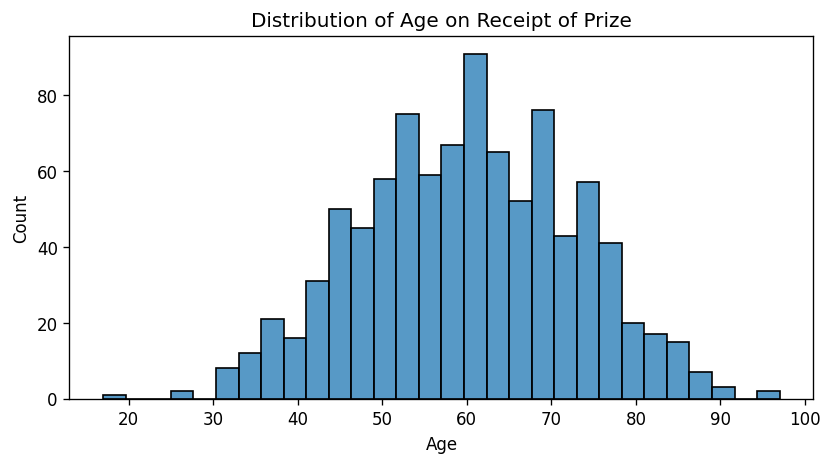

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
sns.histplot(
    data=df_data,
    x=df_data.winning_age,
    bins=30
)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

Calculate the descriptive statistics for the age at the time of the award.

In [ ]:
df_data.winning_age.describe()

count    934.000000
mean      59.948608
std       12.617785
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: winning_age, dtype: float64

Challenge 4

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

    Use Seaborn to create a .regplot with a trendline.

    Set the lowess parameter to True to show a moving average of the linear fit.

    According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?

    According to the best fit line, what age would it predict for a Nobel laureate in 2020?

**REVIEW**

Using the lowess parameter allows us to plot a local linear regression. This means the best fit line is still linear, but it's more like a moving average which gives us a non-linear shape across the entire series. This is super neat because it clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



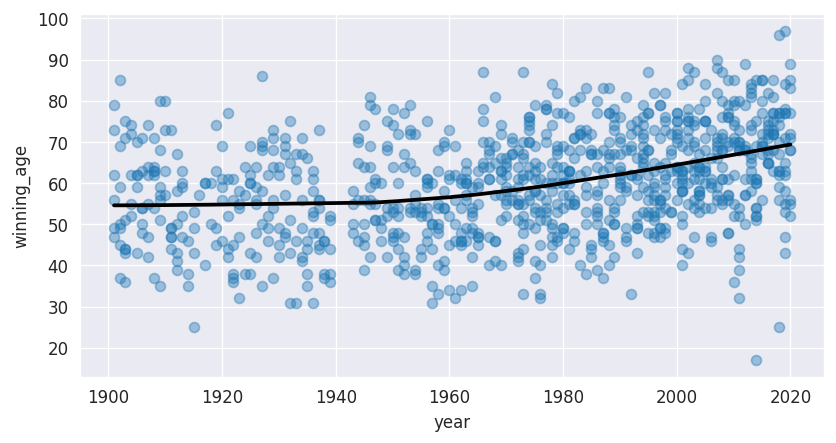

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
with sns.axes_style('darkgrid'):
  sns.regplot(
    data=df_data, 
    x="year", 
    y="winning_age",
    lowess=True, 
    scatter_kws = {'alpha': 0.4},
    line_kws={'color': 'black'} )
plt.show()

Challenge 5

How does the age of laureates vary by category?

    Use Seaborn's .boxplot() to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?

    In which prize category are the average winners the oldest?

    In which prize category are the average winners the youngest?

    You can also use plotly to create the box plot if you like.

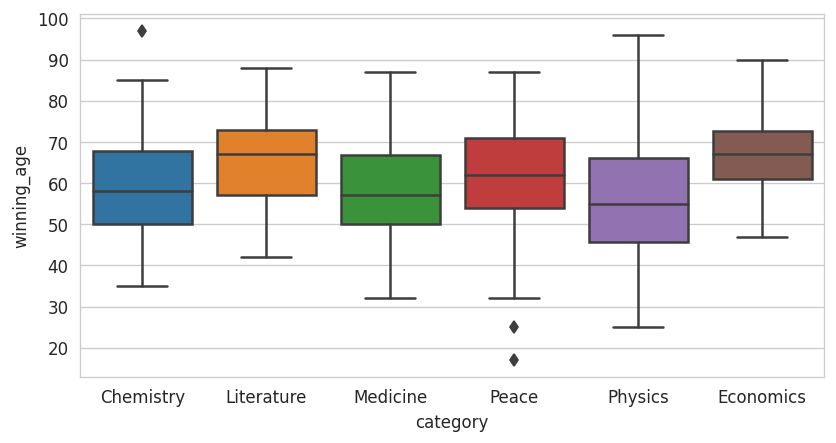

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
with sns.axes_style('whitegrid'):
  sns.boxplot(
      data=df_data,
      x='category',
      y='winning_age'
  )
  plt.show()

The box plot shows us the mean, the quartiles, the maximum and the minimum values. It raises an interesting question: "Are peace prize winners really older than physics laureates?

Challenge 6

    Now use Seaborn's .lmplot() and the row parameter to create 6 separate charts for each prize category. Again set lowess to True.

    What are the winning age trends in each category?

    Which category has the age trending up and which category has the age trending down?

    Is this .lmplot() telling a different story from the .boxplot()?

    Create a third chart with Seaborn. This time use .lmplot() to put all 6 categories on the same chart using the hue parameter.

<Figure size 960x480 with 0 Axes>

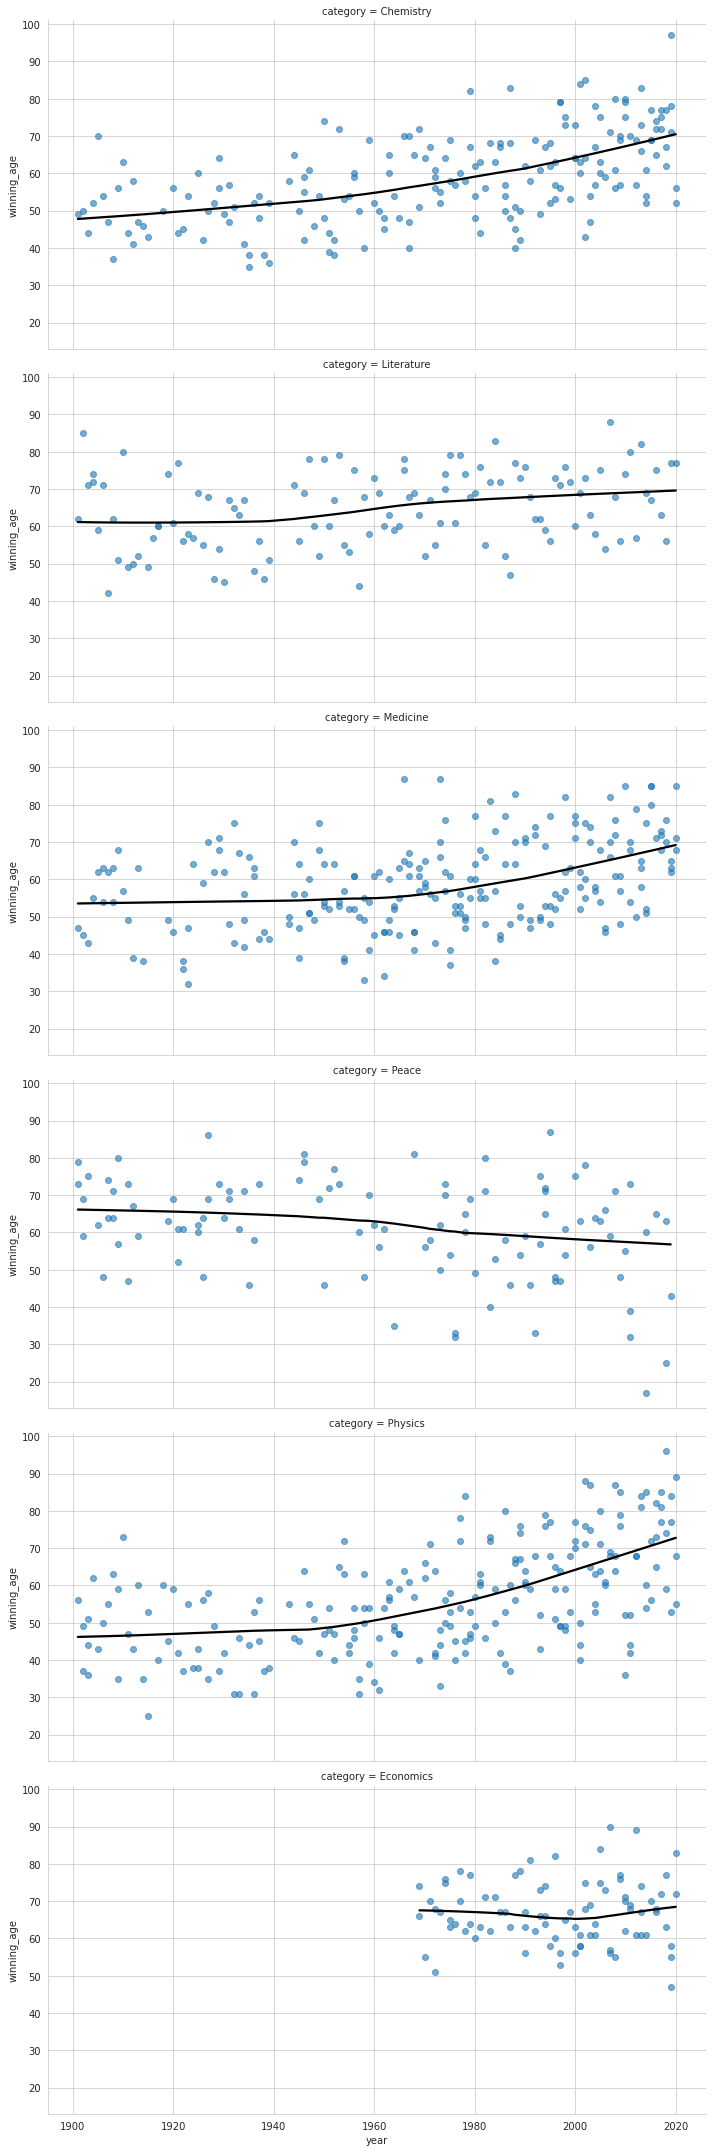

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
with sns.axes_style('whitegrid'):
  sns.lmplot(
      data=df_data,
      x='year',
      y='winning_age',
      row = 'category',
      lowess=True, 
      aspect=2,
      scatter_kws = {'alpha': 0.6},
      line_kws = {'color': 'black'},
      )

plt.show()

<Figure size 960x480 with 0 Axes>

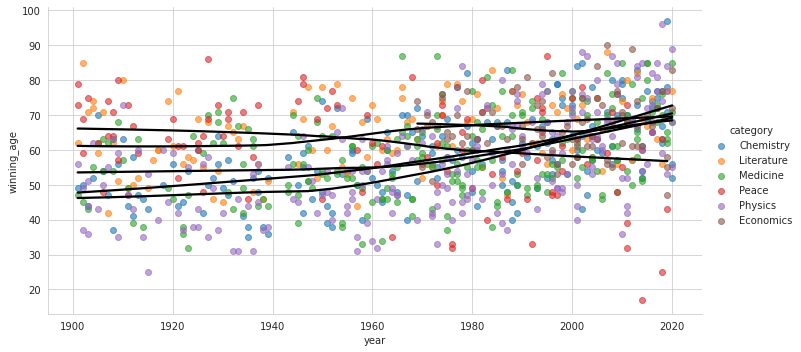

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
with sns.axes_style('whitegrid'):
  sns.lmplot(
      data=df_data,
      x='year',
      y='winning_age',
      hue = 'category',
      lowess=True, 
      aspect=2,
      scatter_kws = {'alpha': 0.6},
      line_kws = {'color': 'black'},
      )

plt.show()